In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/HR.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 柱状图

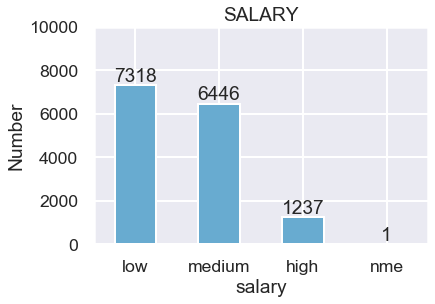

In [24]:
sns.set_style('darkgrid')
sns.set_context(context='poster', font_scale=0.8)
sns.set_palette([sns.color_palette("RdBu", n_colors=7)[5]])
plt.title('SALARY')
plt.xlabel('salary')
plt.ylabel('Number')
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
plt.axis([0,4,0,10000])
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts(),width=0.5)
for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va='bottom')

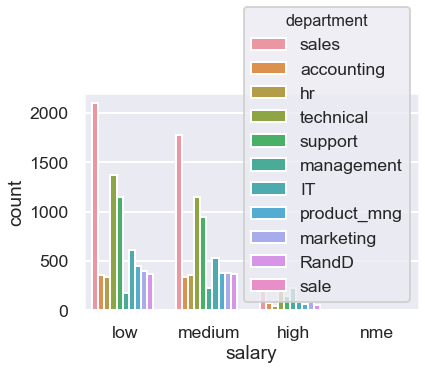

In [30]:
sns.set_style('darkgrid')
sns.set_context(context='poster', font_scale=0.8)
sns.set_palette(sns.color_palette("RdBu", n_colors=7))

sns.countplot(x='salary', hue='department',data=df)

# 直方图

In [31]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

In [32]:
f.add_subplot(1,3,1)

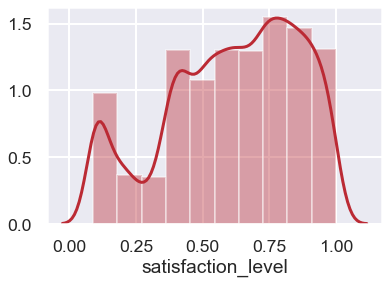

In [36]:
# kde, hist 两个参数可选
sns.distplot(df['satisfaction_level'].dropna(), bins=10)

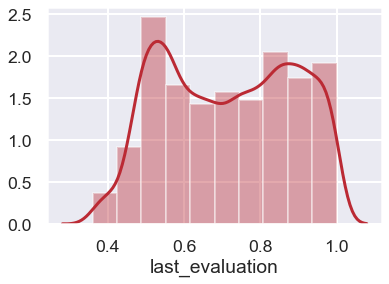

In [37]:
sns.distplot(df['last_evaluation'][df['last_evaluation']<=1].dropna(), bins=10)

In [38]:
amh_s = df['average_monthly_hours']
amh_s = amh_s[amh_s<amh_s.quantile(0.75)+1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))][amh_s>amh_s.quantile(0.25)-1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))]

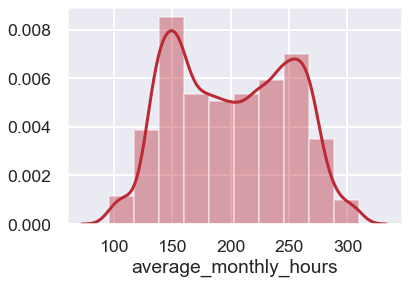

In [39]:
sns.distplot(amh_s, bins=10)

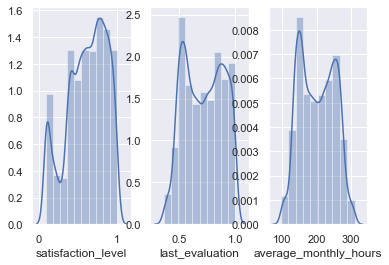

In [43]:
sns.set()
f = plt.figure()
f.add_subplot(1,3,1)
sns.distplot(df['satisfaction_level'].dropna(), bins=10)
f.add_subplot(1,3,2)
sns.distplot(df['last_evaluation'][df['last_evaluation']<=1].dropna(), bins=10)
f.add_subplot(1,3,3)
sns.distplot(amh_s, bins=10)

# 箱线图

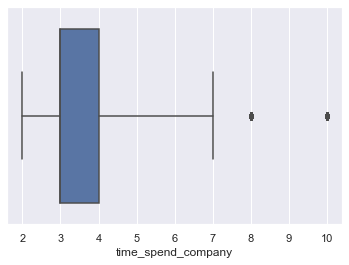

In [47]:
# saturation 分位数, whis 是上下界中的k
sns.boxplot(x=df['time_spend_company'], saturation=0.75, whis=3)

# 折线图

In [48]:
sub_df = df.groupby('time_spend_company').mean()

In [50]:
sub_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,Work_accident,left,promotion_last_5years
time_spend_company,,,,,,,
2,0.697079,0.717498,3.686903,200.120185,0.171957,0.016641,0.016641
3,0.626314,155.827477,3.327386,186.624050,0.138867,0.246393,0.020791
4,0.467517,0.767927,4.627689,223.455221,0.124364,0.348064,0.013688
5,0.610305,0.813666,4.519348,222.978955,0.116090,0.565513,0.011541
6,0.603440,0.754875,4.213092,212.051532,0.149025,0.291086,0.023677
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.000000,0.191489
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.000000,0.061728
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.000000,0.074766


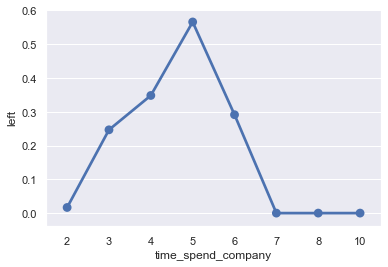

In [49]:
sns.pointplot(sub_df.index, sub_df['left'])

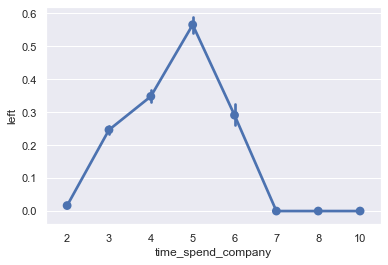

In [51]:
sns.pointplot(x='time_spend_company', y='left', data=df)

# 饼图

([<matplotlib.patches.Wedge at 0x2b2a1a3c888>,
 [Text(0.7765728755096903, 0.9148412807818694, 'sales'),
  Text(-0.7357926348317934, 0.8176852686255802, 'technical'),
  Text(-1.0783949916350632, -0.2169429464546191, 'support'),
  Text(-0.6642488918089026, -0.8767972455081307, 'IT'),
  Text(-0.22123175699072947, -1.0775233221136307, 'product_mng'),
  Text(0.18183139441835727, -1.0848674315343216, 'marketing'),
  Text(0.5375186165260476, -0.9597258654886425, 'RandD'),
  Text(0.8161427722434347, -0.7375032035962971, 'accounting'),
  Text(1.0046437842803067, -0.4479853420670645, 'hr'),
  Text(1.0903193609509976, -0.14561487264496178, 'management'),
  Text(1.0999999035619843, -0.00046061222888778194, 'sale')],
 [Text(0.45300084404731933, 0.5336574137894238, '27.6%'),
  Text(-0.4013414371809782, 0.4460101465230437, '18.1%'),
  Text(-0.5882154499827618, -0.11833251624797403, '14.9%'),
  Text(-0.36231757735031045, -0.47825304300443483, '8.2%'),
  Text(-0.1206718674494888, -0.5877399938801621, '

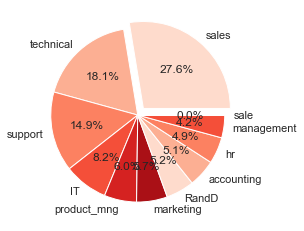

In [55]:
lbs=df['department'].value_counts().index
explodes=[0.1 if i=='sales' else 0 for i in lbs]
plt.pie(df['department'].value_counts(normalize=True), explode=explodes, labels=lbs, autopct='%1.1f%%',colors=sns.color_palette('Reds'))

([<matplotlib.patches.Wedge at 0x2b2a1ab1a08>,
 [Text(0.04597569854555077, 1.199118941199433, 'low'),
  Text(-0.3225221741004068, -1.0516555744223235, 'medium'),
  Text(1.0631810868577516, -0.28221618760795786, 'high'),
  Text(1.0999999757366108, -0.0002310399443286058, 'nme')],
 [Text(0.02681915748490461, 0.6994860490330024, '48.8%'),
  Text(-0.17592118587294914, -0.5736303133212672, '43.0%'),
  Text(0.5799169564678645, -0.15393610233161334, '8.2%'),
  Text(0.599999986765424, -0.00012602178781560315, '0.0%')])

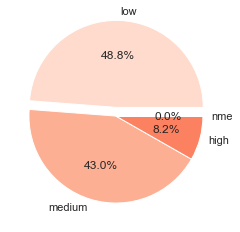

In [56]:
lbs=df['salary'].value_counts().index
explodes=[0.1 if i=='low' else 0 for i in lbs]
plt.pie(df['salary'].value_counts(normalize=True), explode=explodes, labels=lbs, autopct='%1.1f%%',colors=sns.color_palette('Reds'))

# 总结

In [57]:
df.sample(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
10582,0.62,0.5,4,156,2,0,0,0,support,medium


根据整体数据集分析具体的单条数据